## Analyzing students performance in Exams

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

#### Uploading .csv file

In [2]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Overview of data

Checking number of rows and columns

In [3]:
df.shape

(1000, 8)

Checking null values.

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Checking duplicates.

In [5]:
df.duplicated().sum()

0

Performing basical statistical calculations.

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Average grades for all three tests are around 66-68 points. Only 25% of students has scores higher than 77 in maths, and 79 in reading/writing.

#### Showing counts by categories

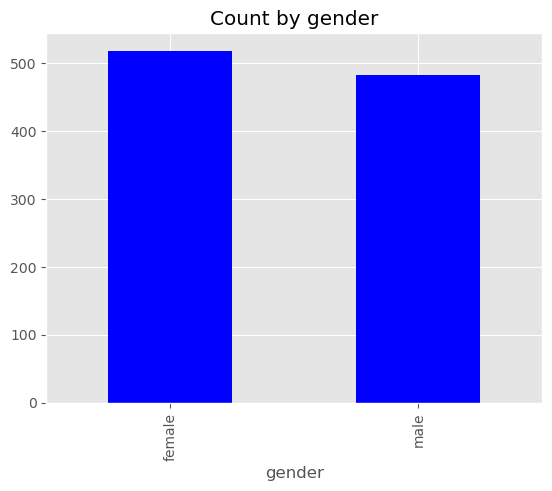

In [7]:
df.value_counts('gender').plot(kind='bar', title='Count by gender', color='b')
plt.show()

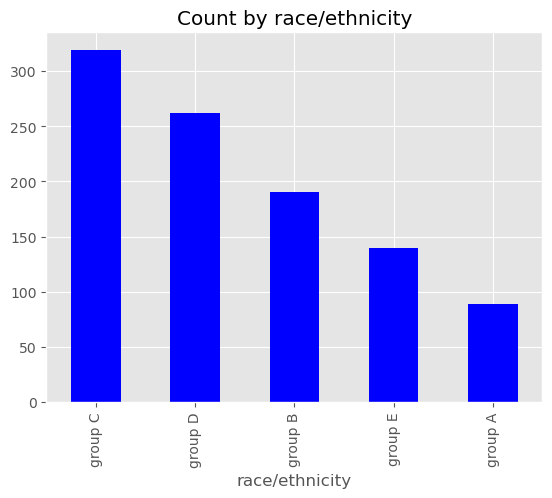

In [8]:
df.value_counts('race/ethnicity').plot(kind='bar', title='Count by race/ethnicity', color='b')
plt.show()

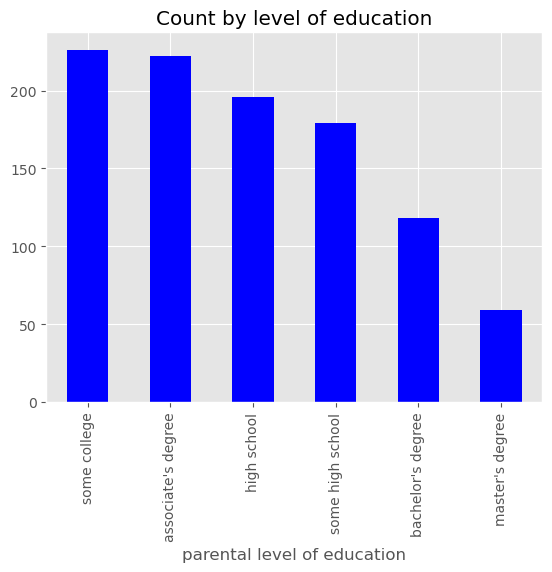

In [9]:
df.value_counts('parental level of education').plot(kind='bar', title='Count by level of education', color='b')
plt.show()

#### Finding correlations between test scores

<Axes: >

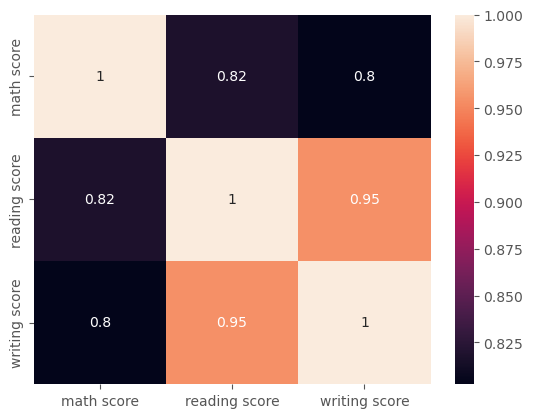

In [10]:
df_corr=df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)

There is a strong correlation between reading and writing scores.

#### Creating histogram for math grades

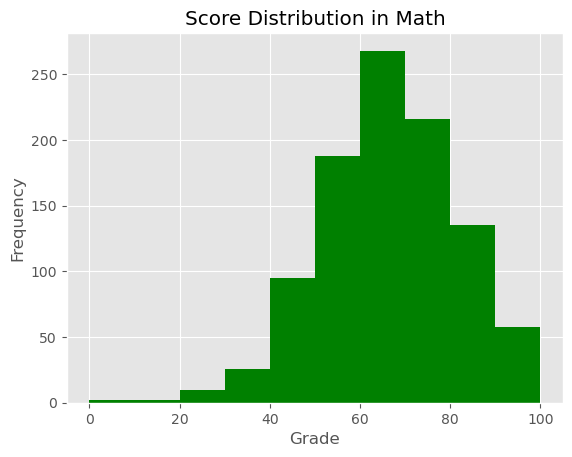

In [11]:
math_hist=df['math score'].plot(kind='hist', title='Score Distribution in Math', color='g')
math_hist.set_xlabel('Grade')
plt.show()

Most students have math scores between 50 and 80.

#### Grouping students by the race/ethnicity and suming total test scores by groups

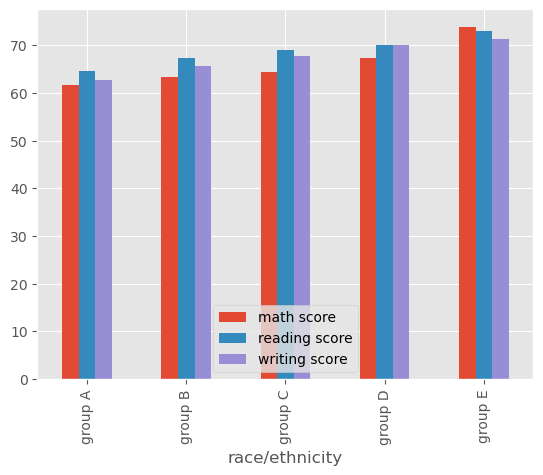

In [12]:
df.groupby('race/ethnicity').mean(numeric_only=True) \
.plot(kind='bar')
plt.show()

Students from race group E are undoubtely performing the best scores in all three disciplines.

#### Grouping students by the gender

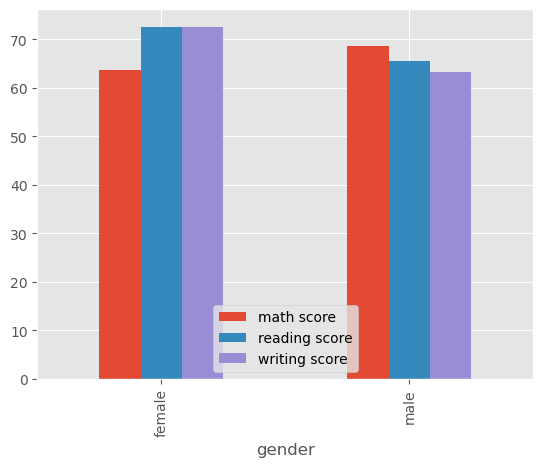

In [13]:
df.groupby('gender').mean(numeric_only=True) \
.plot(kind='bar')
plt.show()

While male students are better in Math, female students are giving much higher scores in Reading and Writing.

#### Grouping students by the level of education

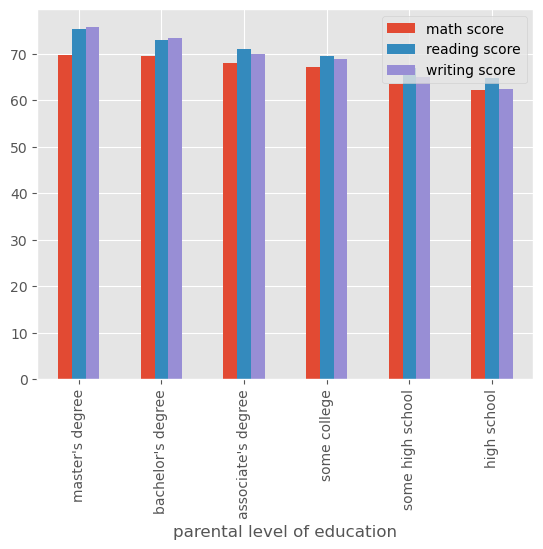

In [14]:
df.groupby('parental level of education').mean(numeric_only=True) \
.sort_values(by='math score', ascending=False) \
.plot(kind='bar')
plt.show()

The higher the degree is, the better are the scores. Students with bachelor and master degree are performing better than those with lower degrees.

#### Grouping students by the test preparation

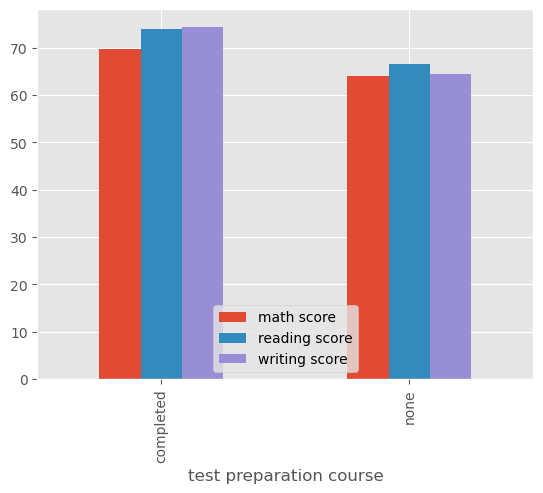

In [15]:
df.groupby('test preparation course').mean(numeric_only=True).plot(kind='bar')
plt.show()

Those students who took preparation course, achieved much better scores.

#### Grouping students by the reduced/standard lunch

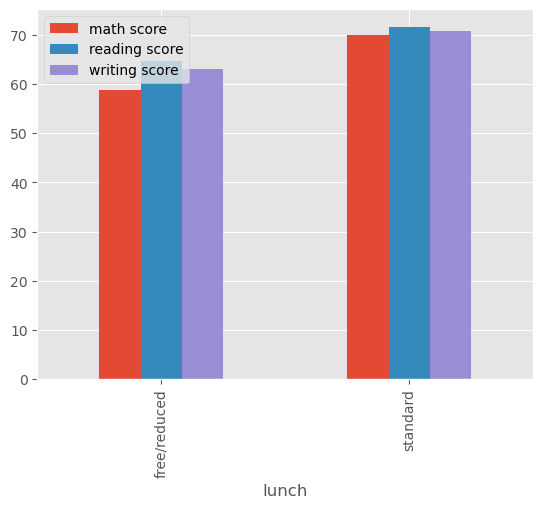

In [16]:
df.groupby('lunch').mean(numeric_only=True).plot(kind='bar')
plt.show()

Students who had standard lunch, performed better results, than those without it.

#### Showing top20 students in Math

In [17]:
math_top_20=df.sort_values(by='math score', ascending=False).head(20)
math_top_20

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
149,male,group E,associate's degree,free/reduced,completed,100,100,93
916,male,group E,bachelor's degree,standard,completed,100,100,100
263,female,group E,high school,standard,none,99,93,90
306,male,group E,some college,standard,completed,99,87,81
114,female,group E,bachelor's degree,standard,completed,99,100,100


In [18]:
math_top_20.value_counts('race/ethnicity')

race/ethnicity
group E    10
group C     4
group D     3
group A     2
group B     1
dtype: int64

50% from top 20 students in Math, are the students from Group E. However, in the top 20 list, there is no single student with master's degree! That could leads to assumption that best mathematicians are generally not those with high degrees.